In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [3]:
def drop_columns(df, regex):
    return df.drop(columns=df.filter(regex=regex))

In [4]:
rate_df = pd.read_csv(Path('/home/gfindlay/Documents/ecephys_analyses/notebooks/SPWs/Analysis/generate-dataframes/spw-incidence.csv'))
rate_df = drop_columns(rate_df, 'count|duration')

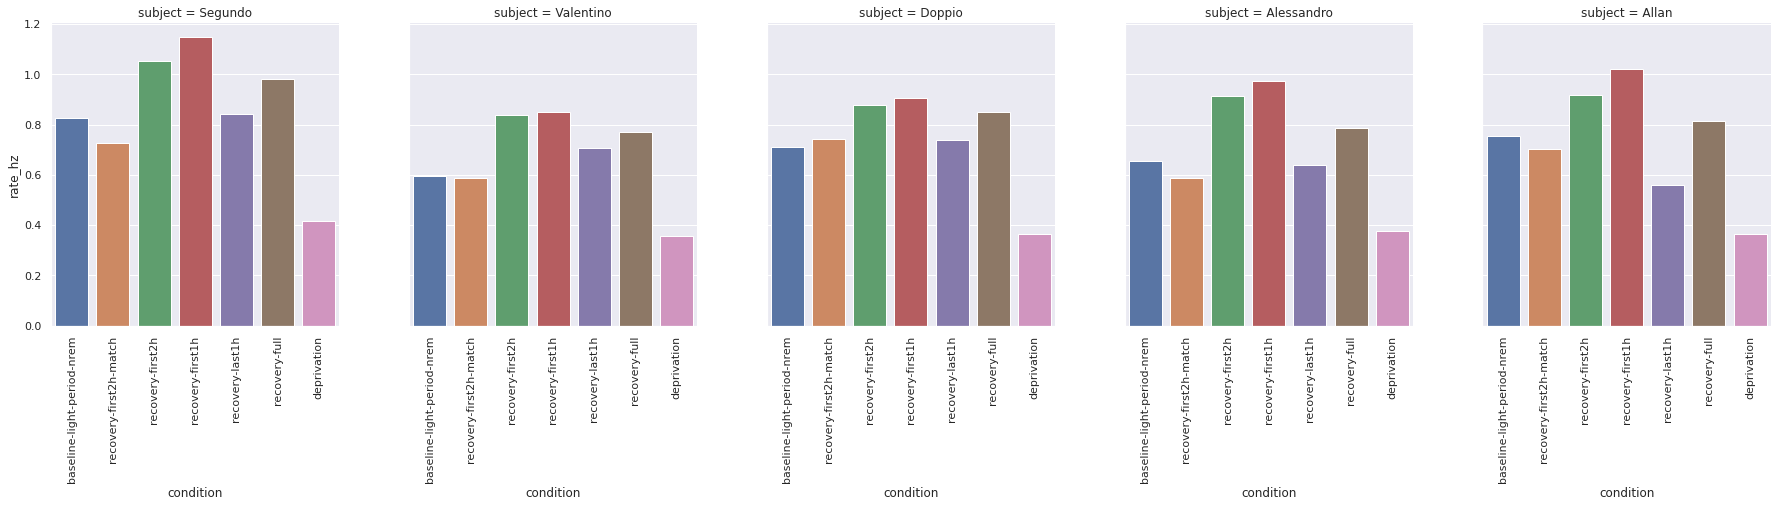

In [5]:
g = sns.catplot(data=rate_df, col='subject', x='condition', y='rate_hz', kind='bar')
g.set_xticklabels(rotation=90)

In [6]:
norms = rate_df.set_index(['subject', 'condition']).xs((slice(None), 'baseline-light-period-nrem')).rate_hz
normed_rates = rate_df.set_index(['subject', 'condition']).rate_hz / norms * 100
normed_rates = normed_rates.rename('normalized_rate')
normed_rate_df = normed_rates.to_frame().reset_index()

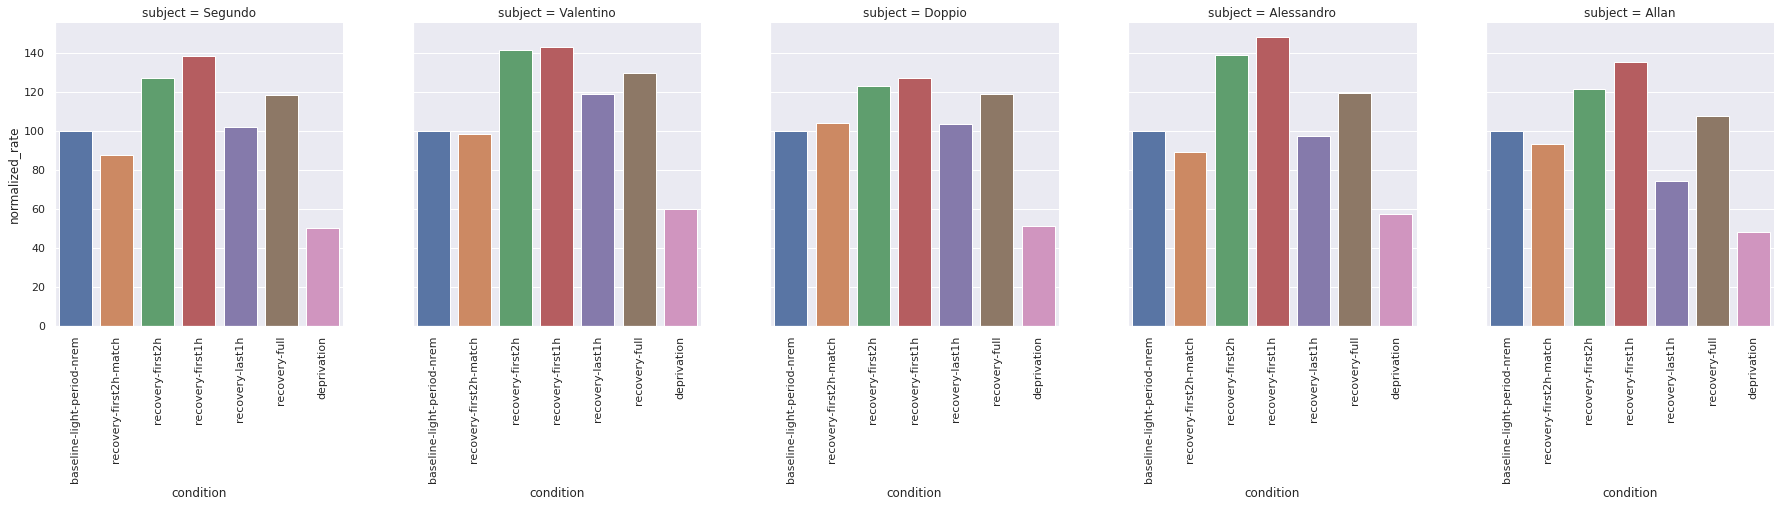

In [7]:
g = sns.catplot(data=normed_rate_df, col='subject', x='condition', y='normalized_rate', kind='bar')
g.set_xticklabels(rotation=90)

In [8]:
pwr_df = pd.read_csv(Path('/home/gfindlay/Documents/ecephys_analyses/notebooks/SPWs/Analysis/generate-dataframes/recovery-sleep-first2h-bandpower-unnormalized.csv')).replace({'recovery-sleep-first2h': 'recovery'})
pwr_df_norm = pd.read_csv(Path('/home/gfindlay/Documents/ecephys_analyses/notebooks/SPWs/Analysis/generate-dataframes/recovery-sleep-first2h-bandpower-unnormalized.csv')).replace({'recovery-sleep-first2h': 'recovery'})

In [9]:
dep_rates = rate_df[rate_df['condition'] == 'deprivation'][['subject', 'rate_hz']]
normed_dep_rates = normed_rate_df[normed_rate_df['condition'] == 'deprivation'][['subject', 'normalized_rate']]

In [10]:
rec_pwr = drop_columns(pwr_df[pwr_df['region'] == 'sr_wm_ref'], 'region|condition')
normed_rec_pwr = drop_columns(pwr_df_norm[pwr_df_norm['region'] == 'sr_wm_ref'], 'region|condition')

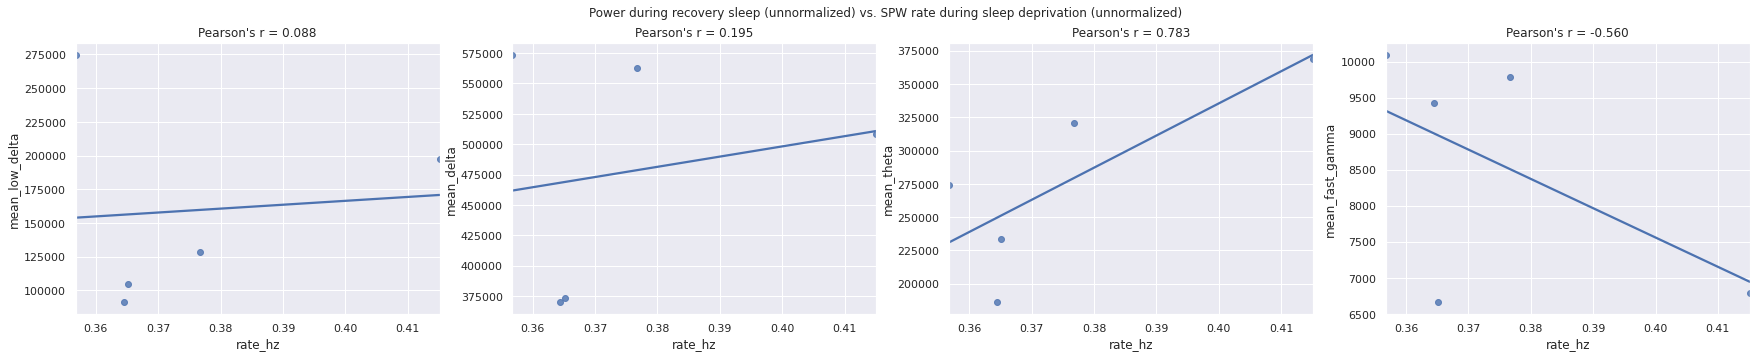

In [36]:
df = rec_pwr.merge(dep_rates)
fig, axes = plt.subplots(1, 4, figsize=(30, 5))
fig.suptitle('Power during recovery sleep (unnormalized) vs. SPW rate during sleep deprivation (unnormalized)')
y_vars = ['mean_low_delta', 'mean_delta', 'mean_theta', 'mean_fast_gamma']
for y_var, ax in zip(y_vars, axes):
    g = sns.regplot(data=df, x='rate_hz', y=y_var, ci=None, ax=ax)
    g.set(title=f"Pearson's r = {df.corr()['rate_hz'][y_var]:.3f}")

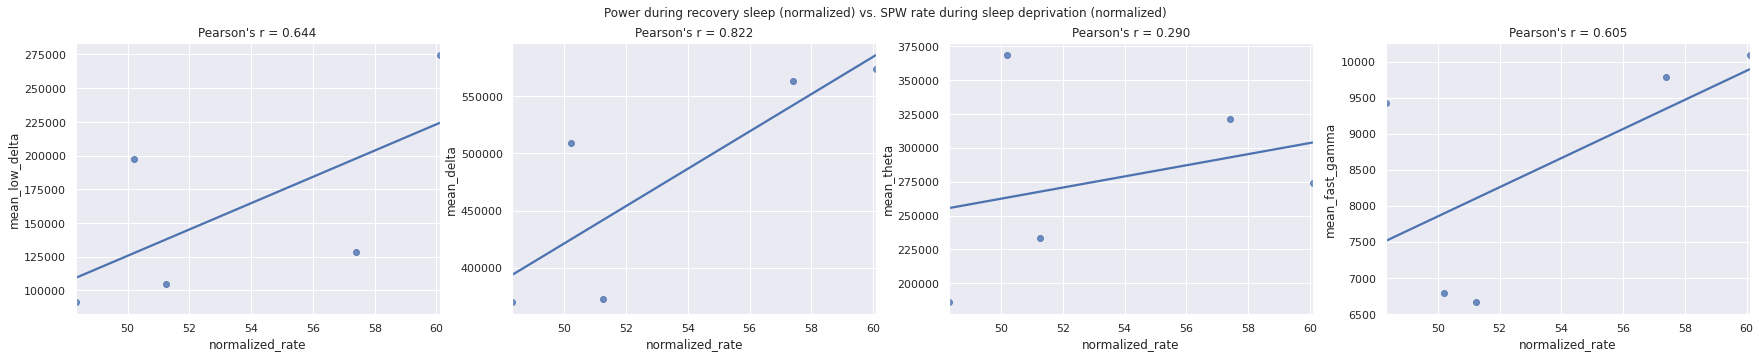

In [37]:
df = normed_rec_pwr.merge(normed_dep_rates)
fig, axes = plt.subplots(1, 4, figsize=(30, 5))
fig.suptitle('Power during recovery sleep (normalized) vs. SPW rate during sleep deprivation (normalized)')
y_vars = ['mean_low_delta', 'mean_delta', 'mean_theta', 'mean_fast_gamma']
for y_var, ax in zip(y_vars, axes):
    g = sns.regplot(data=df, x='normalized_rate', y=y_var, ci=None, ax=ax)
    g.set(title=f"Pearson's r = {df.corr()['normalized_rate'][y_var]:.3f}")

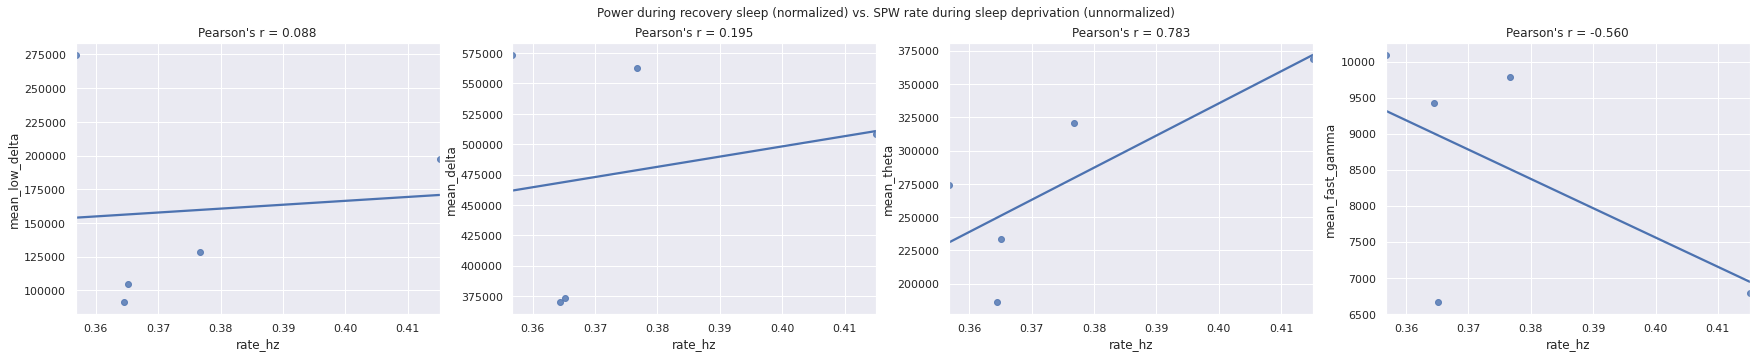

In [38]:
df = normed_rec_pwr.merge(dep_rates)
fig, axes = plt.subplots(1, 4, figsize=(30, 5))
fig.suptitle('Power during recovery sleep (normalized) vs. SPW rate during sleep deprivation (unnormalized)')
y_vars = ['mean_low_delta', 'mean_delta', 'mean_theta', 'mean_fast_gamma']
for y_var, ax in zip(y_vars, axes):
    g = sns.regplot(data=df, x='rate_hz', y=y_var, ci=None, ax=ax)
    g.set(title=f"Pearson's r = {df.corr()['rate_hz'][y_var]:.3f}")